
Target Column: 0.49612


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0143 - loss: 186.1109 - val_accuracy: 0.0455 - val_loss: 4.5280
Epoch 2/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0387 - loss: 169.8145 - val_accuracy: 0.0758 - val_loss: 4.2736
Epoch 3/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0596 - loss: 150.9865 - val_accuracy: 0.0829 - val_loss: 4.0632
Epoch 4/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0673 - loss: 132.5168 - val_accuracy: 0.0894 - val_loss: 3.9459
Epoch 5/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0717 - loss: 121.2972 - val_accuracy: 0.0929 - val_loss: 3.8706
Epoch 6/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0809 - loss: 115.3506 - val_accuracy: 0.0957 - val_loss: 3.8040
Epoch 7/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0803 - loss: 111.2554 - val_accuracy: 0.0978 - val_loss: 3.7353
Epoch 8/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0850 - loss: 108

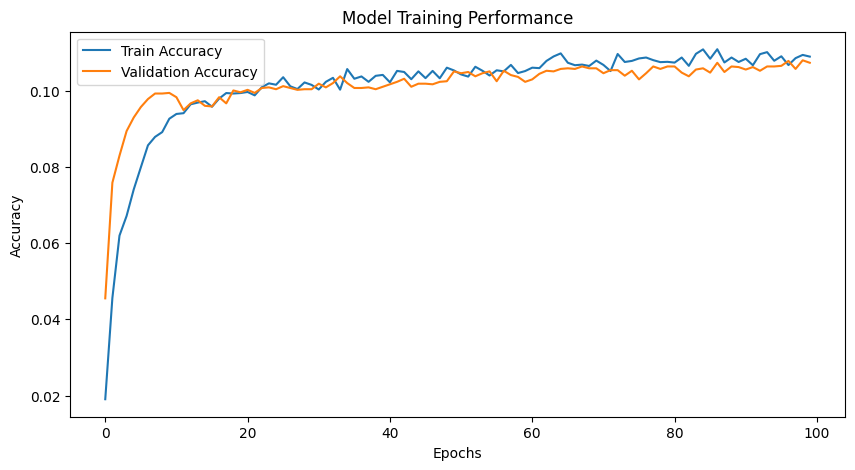

In [8]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for handling datasets
import os  # Importing OS module to manage file paths
import matplotlib.pyplot as plt  # Importing Matplotlib for visualization
import seaborn as sns  # Importing Seaborn for enhanced plots

# Importing necessary modules from Scikit-Learn for data preprocessing
from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardizing data for better performance
from sklearn.utils.class_weight import compute_class_weight  # Handling class imbalances

# Importing TensorFlow and Keras for building the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential  # Creating a sequential model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # Layers for the model
from tensorflow.keras.optimizers import Adam  # Adam optimizer for training
from tensorflow.keras.utils import to_categorical  # Convert labels into categorical format

# Load EEG Dataset
# Define the dataset path
data_path = "/root/.cache/kagglehub/datasets/amananandrai/complete-eeg-dataset/versions/1"

# Select a CSV file to load (Adjust as needed)
file_to_load = os.path.join(data_path, 's25.csv')  # Choose file to load

df = pd.read_csv(file_to_load)  # Read the CSV file into a Pandas DataFrame

# Identify Target Column
target_column = df.columns[-1]  # Assuming the last column is the target label
print(f"\nTarget Column: {target_column}")  # Print the target column name

# Convert target values to integer categories (if necessary)
df[target_column] = df[target_column].astype(int)

# Remove classes with only one instance to prevent training issues
value_counts = df[target_column].value_counts()  # Count occurrences of each class
valid_classes = value_counts[value_counts > 1].index  # Keep only classes with at least 2 samples
df = df[df[target_column].isin(valid_classes)]  # Filter dataset

# Splitting Features (X) and Labels (y)
X = df.iloc[:, :-1].values  # Extract feature columns (EEG data)
y = df.iloc[:, -1].values  # Extract target labels

# Normalize Features
scaler = StandardScaler()  # Initialize StandardScaler
X_scaled = scaler.fit_transform(X)  # Apply normalization to features

# Convert Labels to Categorical Format
num_classes = len(np.unique(y))  # Count unique classes in target labels
y_categorical = to_categorical(y, num_classes=num_classes)  # Convert to categorical format

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y
)  # Splitting data into 80% training and 20% testing

# Compute Class Weights to Handle Imbalanced Data
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)  # Compute weights
class_weight_dict = dict(enumerate(class_weights))  # Convert weights into dictionary format

# Build Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 128 neurons
    BatchNormalization(),  # Batch normalization to stabilize learning
    Dropout(0.3),  # Dropout to prevent overfitting

    Dense(64, activation='relu'),  # Second hidden layer with 64 neurons
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),  # Third hidden layer with 32 neurons
    BatchNormalization(),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Adam optimizer with a small learning rate
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training

# Train the Model
history = model.fit(
    X_train, y_train, epochs=100, batch_size=64,  # Training for 100 epochs with batch size 64
    validation_data=(X_test, y_test),  # Validate model on test data
    class_weight=class_weight_dict  # Apply class weights to handle imbalance
)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)  # Get test loss and accuracy
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy

# Plot Training History
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Show legend
plt.title('Model Training Performance')  # Plot title
plt.show()  # Display plot



In [17]:
pip install kagglehub tensorflow pandas numpy matplotlib seaborn scikit-learn


Merged Dataset Shape: (154995, 96)
Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27824
           1       0.98      0.98      0.98      3175

    accuracy                           1.00     30999
   macro avg       0.99      0.99      0.99     30999
weighted avg       1.00      1.00      1.00     30999



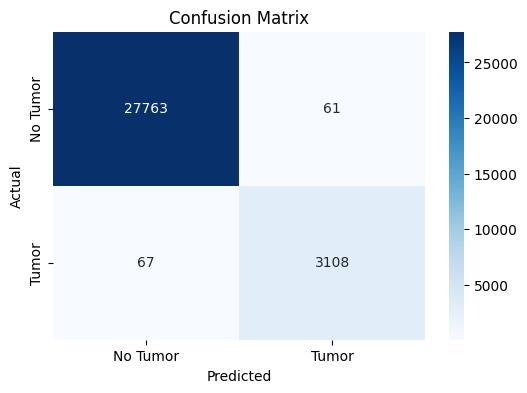

In [9]:
import os  # For handling file directories
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For visualization
import gc  # For garbage collection
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.ensemble import RandomForestClassifier  # RandomForest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation metrics

# Define dataset directory path
dataset_path = "/root/.cache/kagglehub/datasets/amananandrai/complete-eeg-dataset/versions/1/"

# List all available CSV files in the dataset directory
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

# Select only 5 CSV files to prevent memory overload
selected_files = csv_files[:5]
data_list = []  # Initialize an empty list to store dataframes

# Loop through each selected file and load the dataset
for file in selected_files:
    file_path = os.path.join(dataset_path, file)  # Construct file path
    df = pd.read_csv(file_path, low_memory=False)  # Load CSV file into Pandas dataframe
    df['source_file'] = file  # Add a new column to track file origin
    data_list.append(df)  # Append dataframe to list

# Merge all loaded dataframes into a single dataset
full_data = pd.concat(data_list, ignore_index=True)

# Free memory by deleting the list containing separate dataframes
del data_list  # Delete the list to free up space
gc.collect()  # Force garbage collection

# Print the shape (rows, columns) of the merged dataset
print("Merged Dataset Shape:", full_data.shape)

# Keep only numeric columns and remove non-numeric ones
full_data = full_data.select_dtypes(include=[np.number])

# Fill missing values with the mean of respective columns
full_data.fillna(full_data.mean(), inplace=True)

# Split dataset into features (X) and labels (y)
features = full_data.iloc[:, :-1]  # All columns except last are features
labels = full_data.iloc[:, -1]  # Last column is the target (Tumor: Yes/No)

# Convert continuous labels into binary classification (0: No Tumor, 1: Tumor)
if labels.nunique() > 2:  # If target has more than 2 unique values
    labels = (labels > labels.median()).astype(int)  # Convert using median threshold

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Initialize RandomForest Classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix to visualize model performance
plt.figure(figsize=(6,4))  # Set figure size
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel("Predicted")  # Label x-axis
plt.ylabel("Actual")  # Label y-axis
plt.title("Confusion Matrix")  # Set plot title
plt.show()  # Display the plot


Merged Dataset Shape: (154995, 96)


<ipython-input-10-289369134d7d>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette=['green', 'red'])  # Count plot for tumor presence


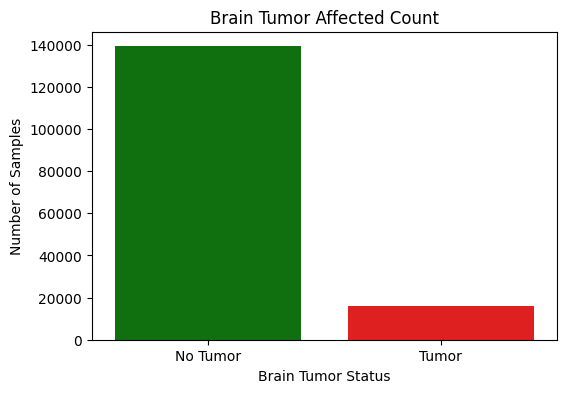

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27824
           1       0.98      0.98      0.98      3175

    accuracy                           1.00     30999
   macro avg       0.99      0.99      0.99     30999
weighted avg       1.00      1.00      1.00     30999



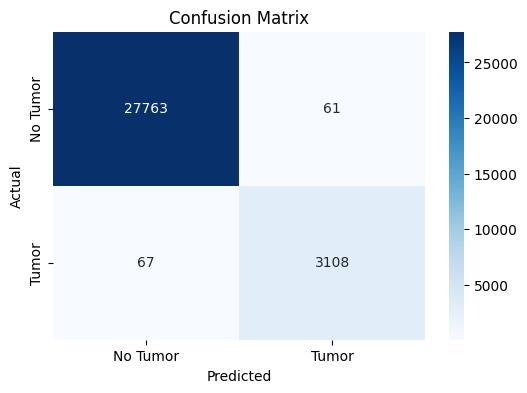

In [10]:
import os  # Import OS module for handling file paths
import pandas as pd  # Pandas for data manipulation
import numpy as np  # NumPy for numerical computations
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs
import seaborn as sns  # Seaborn for enhanced visualization
import gc  # Garbage collection for memory management

# Importing necessary libraries from Scikit-Learn
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for model training
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics

# Load EEG Data Efficiently
dataset_path = "/root/.cache/kagglehub/datasets/amananandrai/complete-eeg-dataset/versions/1/"  # Path to dataset
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]  # List all CSV files in dataset folder

# Load only 5 files to prevent memory overload
selected_files = csv_files[:5]  # Select first 5 files
data_list = []  # Initialize list to store data

for file in selected_files:
    file_path = os.path.join(dataset_path, file)  # Construct full file path
    df = pd.read_csv(file_path, low_memory=False)  # Load CSV file into DataFrame
    df['source_file'] = file  # Track file origin
    data_list.append(df)  # Append loaded data to list

full_data = pd.concat(data_list, ignore_index=True)  # Merge all selected files into a single DataFrame
del data_list  # Free up memory
gc.collect()  # Run garbage collection

print("Merged Dataset Shape:", full_data.shape)  # Print shape of merged dataset

# Drop Non-Numeric Columns & Handle Missing Data
full_data = full_data.select_dtypes(include=[np.number])  # Keep only numeric columns
full_data.fillna(full_data.mean(), inplace=True)  # Replace NaNs with column means

# Train-Test Split
features = full_data.iloc[:, :-1]  # Extract EEG feature columns (all except last column)
labels = full_data.iloc[:, -1]  # Extract target labels (last column)

# Convert Continuous Labels to Binary (Tumor/No Tumor)
if labels.nunique() > 2:  # If more than two unique values exist
    labels = (labels > labels.median()).astype(int)  # Convert to binary (0/1) based on median threshold

# Brain Tumor Affected Count Plot
plt.figure(figsize=(6, 4))  # Set figure size
sns.countplot(x=labels, palette=['green', 'red'])  # Count plot for tumor presence
plt.xticks(ticks=[0, 1], labels=['No Tumor', 'Tumor'])  # Set x-axis labels
plt.xlabel("Brain Tumor Status")  # Label x-axis
plt.ylabel("Number of Samples")  # Label y-axis
plt.title("Brain Tumor Affected Count")  # Set title
plt.show()  # Display plot

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42  # Split 80% train, 20% test
)

# Train RandomForest Model
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)  # Initialize model with 100 trees
model.fit(X_train, y_train)  # Train model on training data

# Evaluate Model
y_pred = model.predict(X_test)  # Predict labels for test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Model Accuracy: {accuracy:.2f}")  # Print accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Print classification report

# Confusion Matrix Plot
plt.figure(figsize=(6,4))  # Set figure size
sns.heatmap(
    confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
    xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor']
)  # Generate confusion matrix heatmap
plt.xlabel("Predicted")  # Label x-axis
plt.ylabel("Actual")  # Label y-axis
plt.title("Confusion Matrix")  # Set title
plt.show()  # Display plot

